In [1]:
import numpy as np  

import sys
sys.path.append("..")

import anndata

import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de

# CellPath

In [2]:
# calculate and formulate the anndata

# import pandas as pd
# import scanpy as sc
# from scipy.sparse import csr_matrix
# path = "./sim_data/Symsim/cycle_tree_rand1/"
# cell_labels = pd.read_csv(path + "cell_labels.txt", sep = "\t")
# cell_labels.head()
# cell_labels = cell_labels.rename({"true_time": "sim_time"}, axis = "columns")
# spliced_counts = pd.read_csv(path + "spliced_counts.txt", sep = "\t", header = None).values
# unspliced_counts = pd.read_csv(path + "unspliced_counts.txt", sep = "\t", header = None).values
# adata = anndata.AnnData(X = csr_matrix(spliced_counts.T), obs = cell_labels)
# adata.layers["spliced"] = csr_matrix(spliced_counts.T)
# adata.layers["unspliced"] = csr_matrix(unspliced_counts.T)
# sc.tl.umap(adata)

In [11]:
num_trajs = 4
resolution = 40

# not pre-clustered
adata = anndata.read_h5ad("../sim_data/Symsim/cycle_tree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)

cellpath_obj.meta_cell_construction(flavor = "leiden", n_clusters = None, resolution = resolution, include_unspliced = True, standardize = True)
cellpath_obj.meta_cell_graph(k_neighs = 7, pruning = False)
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = 5, length_bias = 0.5)
cellpath_obj.first_order_pt(num_trajs = num_trajs, insertion = True, prop_insert = 0.000)

Meta-cell constructed, number of meta-cells: 307
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  34_226 , len:  52 newly covered: 52
start_end:  134_289 , len:  44 newly covered: 20
start_end:  125_235 , len:  47 newly covered: 13
start_end:  34_3 , len:  48 newly covered: 8
start_end:  34_303 , len:  47 newly covered: 6
start_end:  34_225 , len:  49 newly covered: 3
start_end:  34_233 , len:  47 newly covered: 4
start_end:  34_271 , len:  50 newly covered: 2
start_end:  34_263 , len:  52 newly covered: 1
start_end:  34_269 , len:  52 newly covered: 1
start_end:  34_120 , len:  49 newly covered: 2
start_end:  34_219 , len:  49 newly covered: 2
start_end:  34_161 , len:  49 newly covered: 2
start_end:  34_265 , len:  51 newly covered: 1
start_end:  34_266 , len:  51 newly covered: 1
start_end:  34_270 , len:  51 newly covered: 1
start_end:  34_175 , len:  48 newly covered: 2
start_end:  34_294 , 

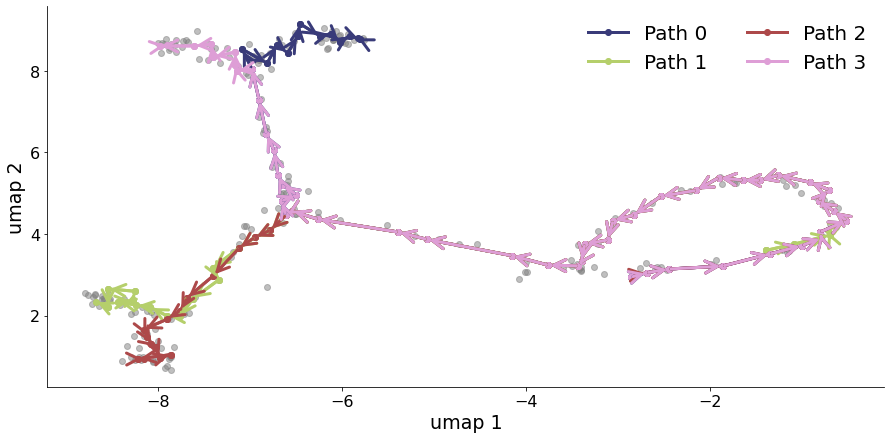

In [12]:
visual.meta_traj_visual(cellpath_obj, basis="umap", trajs = num_trajs, axis = True, save_as = None, figsize = (15,7))

## All in one CellPath

In [22]:
# read in simulated dataset
num_trajs = 4
resolution = 40

# pre-clustered
adata = anndata.read_h5ad("../sim_data/Symsim/cycle_tree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
cellpath_obj.all_in_one(flavor = "leiden", resolution = 40, n_neighs = 7, pruning = False, num_trajs = num_trajs, )

Meta-cell constructed, number of meta-cells: 307
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  34_226 , len:  52 newly covered: 52
start_end:  134_289 , len:  44 newly covered: 20
start_end:  125_235 , len:  47 newly covered: 13
start_end:  34_3 , len:  48 newly covered: 8
start_end:  34_303 , len:  47 newly covered: 6
start_end:  34_263 , len:  52 newly covered: 1
start_end:  34_269 , len:  52 newly covered: 1
start_end:  34_225 , len:  49 newly covered: 3
start_end:  34_271 , len:  50 newly covered: 2
start_end:  34_233 , len:  47 newly covered: 4
start_end:  34_265 , len:  51 newly covered: 1
start_end:  34_266 , len:  51 newly covered: 1
start_end:  34_270 , len:  51 newly covered: 1
Finished
Cell-level pseudo-time inferred


In [23]:
# pseudo-time assignment result
cellpath_obj.pseudo_order

,traj_0,traj_1,traj_2,traj_3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
cell_641,NaN,NaN,NaN,195.0
cell_647,NaN,NaN,NaN,196.0
cell_643,NaN,NaN,NaN,197.0
cell_646,NaN,NaN,NaN,198.0


## Visualization

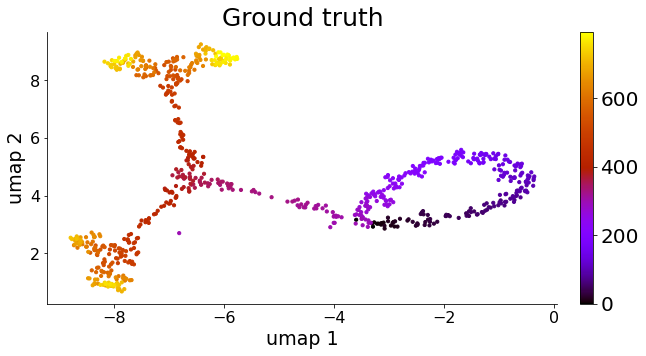

In [15]:
visual.plot_data(cellpath_obj, basis = "umap", figsize = (10,5), axis = True, title = "Ground truth", save_as = None)

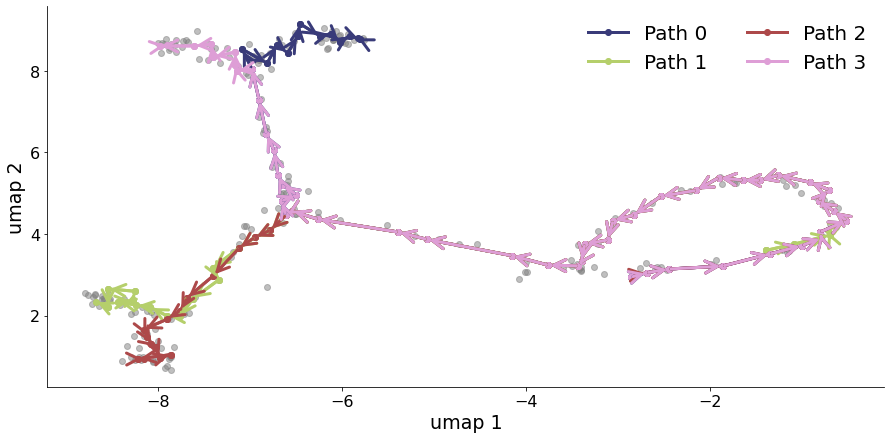

In [24]:
visual.meta_traj_visual(cellpath_obj, basis="umap", trajs = num_trajs, axis = True, save_as = None, figsize = (15,7))

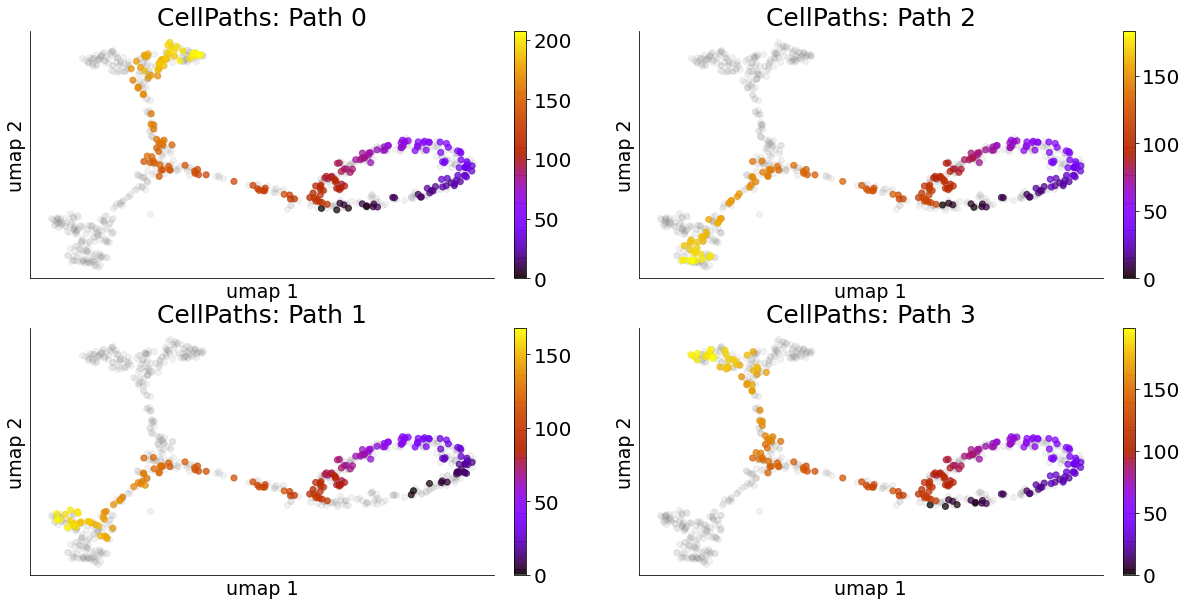

In [25]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = num_trajs, figsize=(20,10), save_as= None)

## Benchmark
* **Differentially expressed genes**: Gene is annotated as index since the dataset is simulated data. 

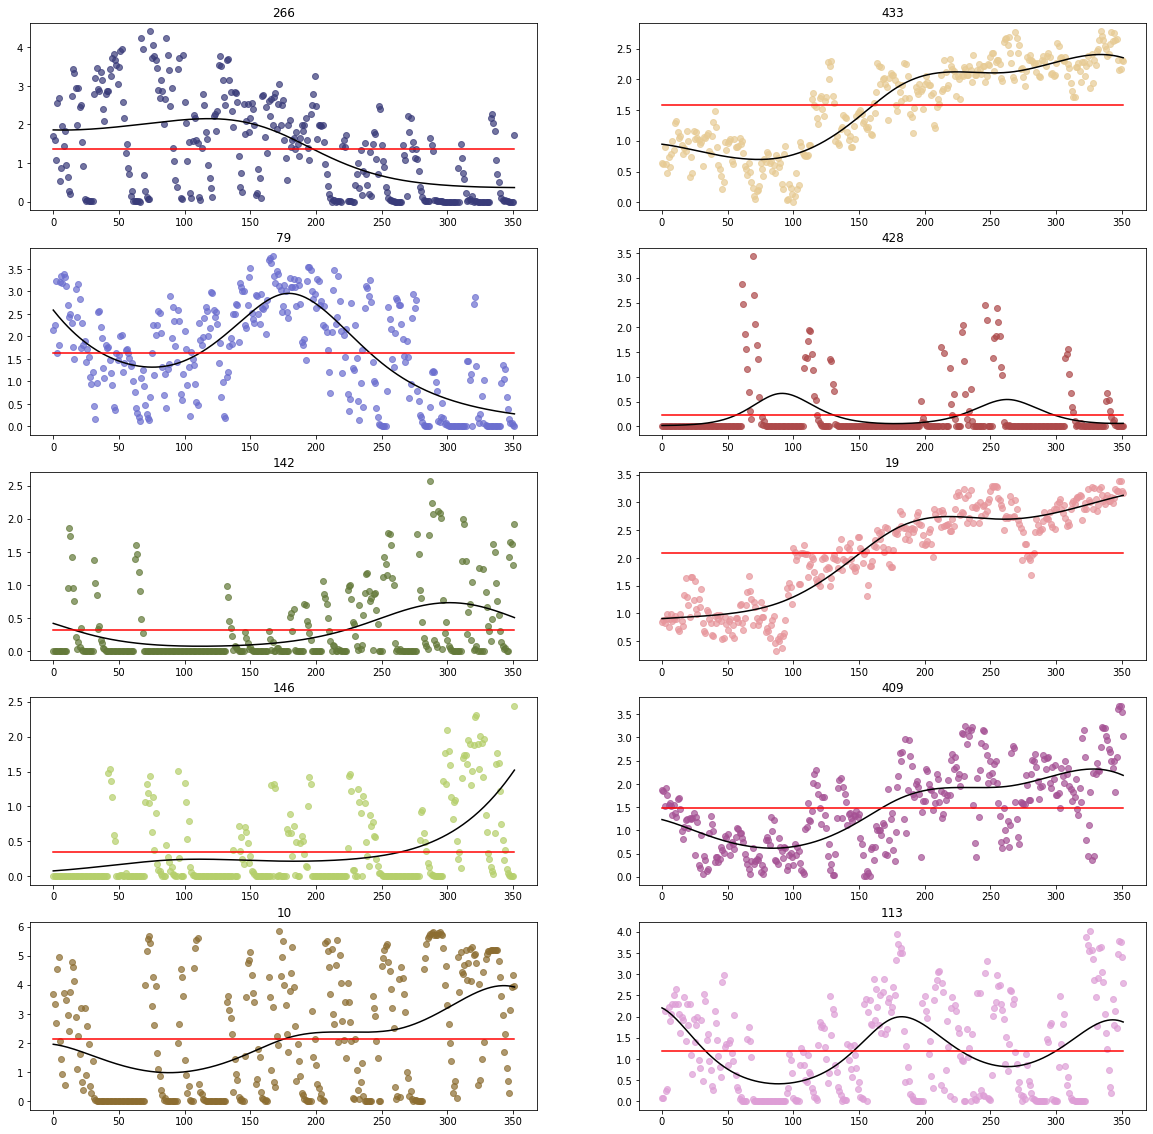

In [11]:
de_genes = de.de_analy(cellpath_obj, p_val_t = 0.05, verbose = False)
de.de_plot(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize = (20,20), n_genes = 10, save_path = None)

* **kendall-tau test**

In [12]:
bmk.cellpath_kt(cellpath_obj)

{'traj_0': 0.8915176848346487,
 'traj_1': 0.8789239367244482,
 'traj_2': 0.8885753967907339,
 'traj_3': 0.8816005064422431}

In [33]:
# separate, path assignment using result from cellpath
pred  = {}
kt = {}
non_zeros = {}
pt_true = {}

for icol, col in enumerate(cellpath_obj.pseudo_order.columns):
    non_zeros[col] = np.where((~np.isnan(cellpath_obj.pseudo_order[col].values.squeeze())) & ((adata.obs["pop"] == "cycle").values))[0]
    pred[col] = cellpath_obj.pseudo_order[col][non_zeros[col]]
    pt_true[col] = cellpath_obj.adata.obs["sim_time"].iloc[non_zeros[col]].values
    kt[col] = bmk.kendalltau(pred[col], pt_true[col])

kt

{'traj_0': 0.8741258741258741,
 'traj_1': 0.8741258741258741,
 'traj_2': 0.8741258741258741,
 'traj_3': 0.8741258741258741}

## latent pseudotime

In [16]:
import scvelo as scv
import matplotlib.pyplot as plt

In [13]:
adata = anndata.read_h5ad("../sim_data/Symsim/cycle_tree_rand1.h5ad")
scv.tl.recover_dynamics(adata)
scv.tl.latent_time(adata)
y_latent = adata.obs["latent_time"].values
pred  = {}
kt = {}
non_zeros = {}
pt_true = {}

# path assignment using cellpath result
for icol, col in enumerate(cellpath_obj.pseudo_order.columns):
    non_zeros[col] = np.where(~np.isnan(cellpath_obj.pseudo_order[col].values.squeeze()))[0]
    pred[col] = y_latent[non_zeros[col]]
    pt_true[col] = cellpath_obj.adata.obs["sim_time"].iloc[non_zeros[col]].values
    kt[col] = bmk.kendalltau(pred[col], pt_true[col])

recovering dynamics
    finished (0:01:56) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing terminal states
    identified 1 region of root cells and 2 regions of end points 
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time
    finished (0:00:00) --> added 
    'latent_time', shared time (adata.obs)


In [14]:
# kendall tau score for latent pseudo-time, path assignment using cellpath result
kt

{'traj_0': 0.251765769752769,
 'traj_1': 0.15610079645641692,
 'traj_2': 0.19778808682017476,
 'traj_3': 0.17542618326690085}

## velocity DPT

In [56]:
adata = anndata.read_h5ad("../sim_data/Symsim/cycle_tree_rand1.h5ad")
scv.tl.velocity_pseudotime(adata)
y_vdpt = adata.obs['velocity_pseudotime'].values
pred  = {}
kt = {}
non_zeros = {}
pt_true = {}

# path assignment using cellpath result
for icol, col in enumerate(cellpath_obj.pseudo_order.columns):
    non_zeros[col] = np.where(~np.isnan(cellpath_obj.pseudo_order[col].values.squeeze()))[0]
    pred[col] = y_vdpt[non_zeros[col]]
    pt_true[col] = cellpath_obj.adata.obs["sim_time"].iloc[non_zeros[col]].values
    kt[col] = bmk.kendalltau(pred[col], pt_true[col])

computing terminal states
    identified 1 region of root cells and 2 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)


In [23]:
# kendall tau score for vdpt, path assignment using cellpath result
kt

{'traj_0': 0.9166221706431885,
 'traj_1': 0.8957771787960469,
 'traj_2': 0.9147410382564859,
 'traj_3': 0.8978885427483557}

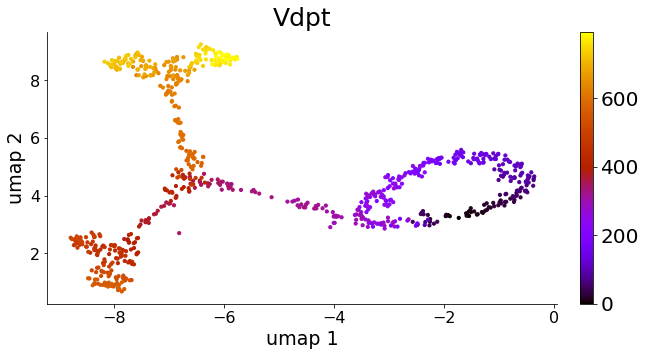

In [57]:
X = cellpath_obj.adata.obsm["X_umap"]
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot()

ax.tick_params(axis = "both", direction = "out", labelsize = 16)
ax.set_xlabel("umap 1", fontsize = 19)
ax.set_ylabel("umap 2", fontsize = 19)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


pic = ax.scatter(X[np.argsort(y_vdpt),0], X[np.argsort(y_vdpt),1], cmap = "gnuplot", c = np.arange(X.shape[0]), alpha = 1, s = 10)
ax.set_title("Vdpt", fontsize = 25)
cbar = fig.colorbar(pic, fraction=0.046, pad=0.04, ax = ax)
cbar.ax.tick_params(labelsize = 20)
fig.savefig("vdpt.png", bbox_inches = 'tight')


In [25]:
# check cycle part inference acc, joint
pred = y_vdpt[(adata.obs["pop"] == "cycle").values]
pt_true = adata.obs["sim_time"].iloc[(adata.obs["pop"] == "cycle").values].values
kt = bmk.kendalltau(pred, pt_true)
kt

0.6099442586399109

In [ ]:
# separate, path assignment using result from cellpath
pred  = {}
kt = {}
non_zeros = {}
pt_true = {}

for icol, col in enumerate(cellpath_obj.pseudo_order.columns):
    non_zeros[col] = np.where((~np.isnan(cellpath_obj.pseudo_order[col].values.squeeze())) & ((adata.obs["pop"] == "cycle").values))[0]
    pred[col] = y_vdpt[non_zeros[col]]
    pt_true[col] = cellpath_obj.adata.obs["sim_time"].iloc[non_zeros[col]].values
    kt[col] = bmk.kendalltau(pred[col], pt_true[col])

In [30]:
kt

{'traj_0': 0.7752913752913752,
 'traj_1': 0.7752913752913752,
 'traj_2': 0.7752913752913752,
 'traj_3': 0.7752913752913752}

In [26]:
# check tree part accuracy, joint

red = y_vdpt[~(adata.obs["pop"] == "cycle").values]
pt_true = adata.obs["sim_time"].iloc[~(adata.obs["pop"] == "cycle").values].values
kt = bmk.kendalltau(pred, pt_true)
kt

0.6137061673853982

In [27]:
# separate, path assignment using result from cellpath

pred  = {}
kt = {}
non_zeros = {}
pt_true = {}

for icol, col in enumerate(cellpath_obj.pseudo_order.columns):
    non_zeros[col] = np.where((~np.isnan(cellpath_obj.pseudo_order[col].values.squeeze())) & (~(adata.obs["pop"] == "cycle").values))[0]
    pred[col] = y_vdpt[non_zeros[col]]
    pt_true[col] = cellpath_obj.adata.obs["sim_time"].iloc[non_zeros[col]].values
    kt[col] = bmk.kendalltau(pred[col], pt_true[col])

In [28]:
kt

{'traj_0': 0.9451298175269778,
 'traj_1': 0.8743589743589744,
 'traj_2': 0.9196530265763828,
 'traj_3': 0.8745644599303136}

## Slingshot

In [14]:
from sklearn.cluster import KMeans
import scprep
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
adata = anndata.read_h5ad("../sim_data/Symsim/cycle_tree_rand1_clust.h5ad")
X_pca = adata.obsm['X_umap']

In [12]:
n_clusters = 10
init = "k-means++"
n_init = 10
max_iter = 300
tol = 0.0001
kmeans = KMeans(n_clusters, init, n_init, max_iter, tol)
groups = kmeans.fit_predict(X_pca)
meta_data = adata.obs
meta_data['groups'] = groups

Text(0.5, 1.0, 'slingshot clusters')

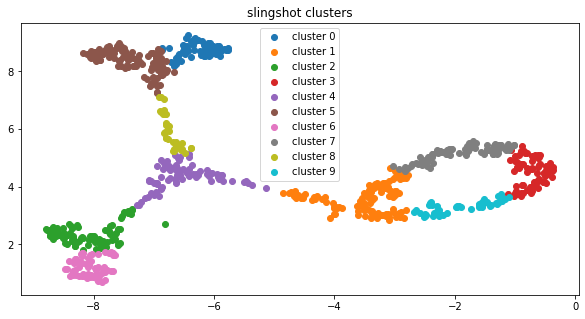

In [15]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot()
c_range = [eval(x) if isinstance(x, str) else x for x in adata.obs['sim_time']]
clusters = int(np.max(groups)+1)
for i in range(clusters):
    sub_cells = np.where(groups == i)[0]
    progression = ax.scatter(X_pca[sub_cells,0], X_pca[sub_cells,1], cmap = plt.get_cmap('Pastel1'))
    # progression = ax.scatter(X_umap[sub_cells,0], X_umap[sub_cells,1], cmap = plt.get_cmap('Pastel1'))

ax.legend(['cluster '+ str(i) for i in range(clusters)])
ax.set_title("slingshot clusters")
# fig.savefig("./syn_results/dataset1/slingshot_clust.pdf")

In [16]:
X_pca_df = pd.DataFrame(index=[str(x) for x in range(X_pca.shape[0])], columns= np.arange(2), data = X_pca[:,0:2])
# scprep.run.install_bioconductor('slingshot')
results = scprep.run.Slingshot(X_pca_df, meta_data['groups'], start_cluster = 1)

R[write to console]: Using full covariance matrix


In [18]:
import importlib 
importlib.reload(visual)

<module 'cellpath.visual' from '../cellpath/visual.py'>

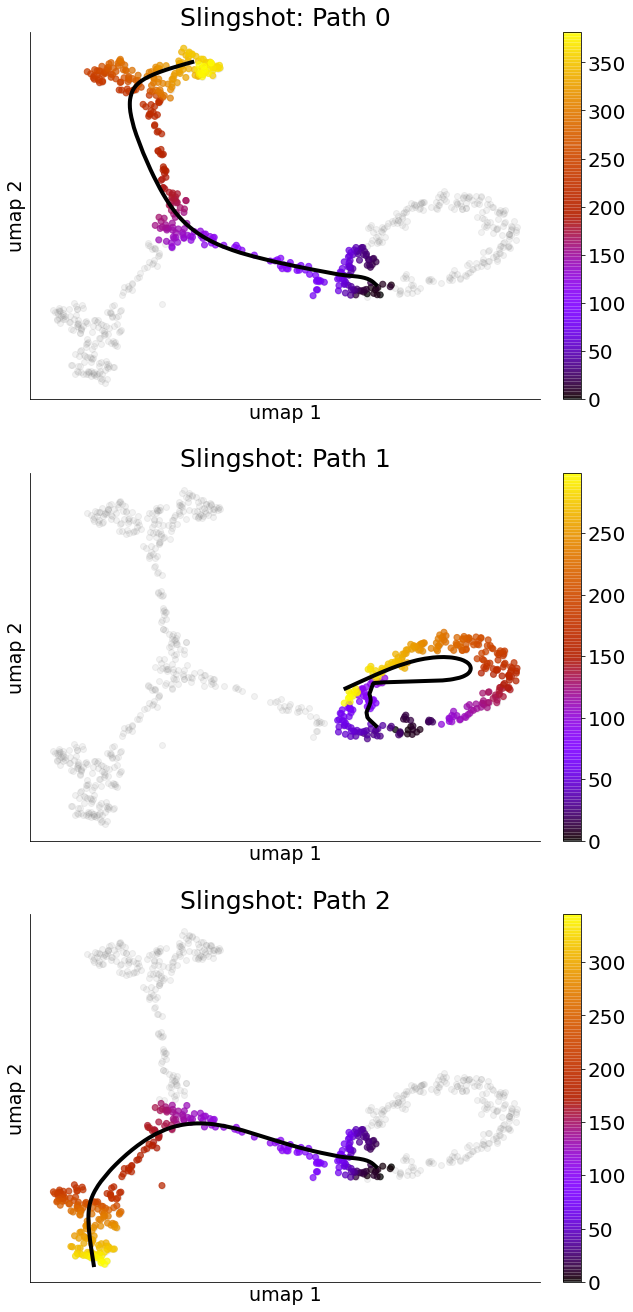

In [20]:
kt_slingshot = visual.slingshot_visual(adata, results, figsize=(10,23), save_as = "cycle-tree.png")

In [26]:
kts = {"CellPaths": kt, "slingshot": kt_slingshot, "vdpt": kt_vdpt}
with open("./sim_results/Symsim/cycle_tree/quantity/rand2.json", "w") as fp:
    json.dump(kts, fp)

In [30]:
with open("./sim_results/Symsim/cycle_tree/quantity/rand1.json", "r") as fp:
    kts_1 = json.load(fp)
with open("./sim_results/Symsim/cycle_tree/quantity/rand2.json", "r") as fp:
    kts_2 = json.load(fp)

In [35]:
kts["CellPaths"] = [x for x in kts_1["CellPaths"].values()]
kts["CellPaths"].extend([x for x in kts_2["CellPaths"].values()])

kts["slingshot"] = [x for x in kts_1["slingshot"].values()]
kts["slingshot"].extend([x for x in kts_2["slingshot"].values()])

kts["vdpt"] = [x for x in kts_1["vdpt"].values()]
kts["vdpt"].extend([x for x in kts_2["vdpt"].values()])


In [21]:
kts_array = [kts["CellPaths"], kts["slingshot"], kts["vdpt"]]

NameError: name &#39;kts&#39; is not defined

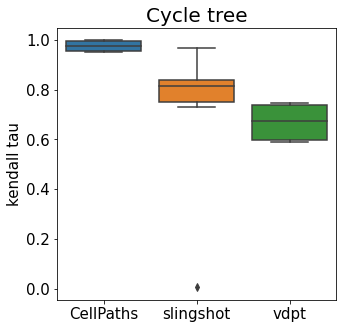

In [74]:
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot()
sns.boxplot(data = kts_array, ax = ax)#, x = ["CellPaths", "slingshot", "vdpt"])
ax.set_xticklabels(["CellPaths", "slingshot", "vdpt"],fontsize = 15)
ax.set_ylabel("kendall tau", fontsize = 15)
plt.yticks(fontsize = 15)
ax.set_title("Cycle tree", fontsize = 20)
fig.savefig("./sim_results/Symsim/cycle_tree/quantity/boxplot.pdf", bbox_inches = "tight")

# Benchmark

In [14]:
bmk_belongings = bmk.purity_count(adata, paths, greedy_paths, trajs = trajs)
bmk_belongings      

,ori_traj_1,ori_traj_2,ori_traj_3,ori_traj_4,ori_traj_5
reconst_1,50,39,44,88,42
reconst_2,49,25,71,23,29
reconst_3,26,43,27,30,63
reconst_4,55,35,44,95,42
reconst_5,52,36,44,93,42
reconst_6,50,39,44,90,42


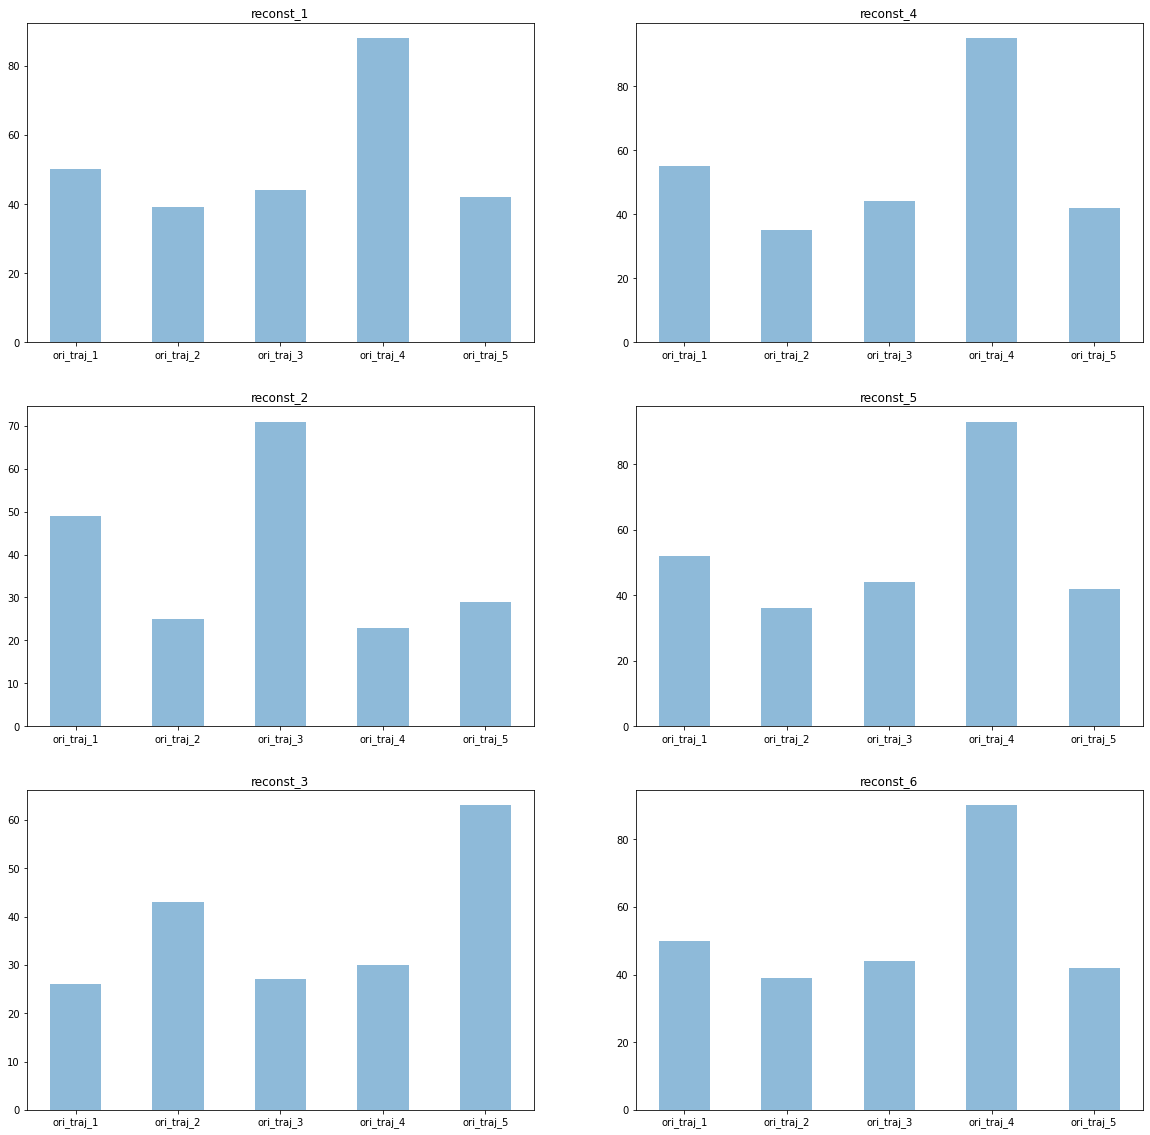

In [15]:
visual.purity_bar(bmk_belongings, trajs = trajs)